데이터분석 보고서란 무엇인가?

* 통계 데이터센터의 자료를 연계 활용 분석하여 사업기획, 창업, 정책 분석, 정책 제안, 현상 연구, 기타 아이디어를 보고서 형식으로 정리한 것
    
* 주제를 정하고 주제에 포함된 문제에 대하여 데이터 분석을 통해 해결 방법을 찾고, 결과 및 활용 방안에 대하여 기술함
    
* 기술 방법으로 주제, 연구 배경, 문제점, 접근 방법, 통계분석결과, 문제해결방안, 결론(제안), 기대효과, 향후 과제(아이디어)의 내용으로 구성함
    
* 데이터분석 보고서는 뚜렷한 목표와 분석결과물과 결론이 있어야하며, 주최측에서 제시하는 자료 1종 이상을 활용해야함
    
* 통계데이터센터(SDC) 제공자료, 마이크로데이터(RDC용, 공공용), 빅데이터 활용지표(온라인가격자료, 생활경제지표, 경제키워드분석, 모바일유동인구지도), 지도로 본 빅데이터(SGIS)
    
* SDC 및 RDC용 자료 활용 시 심사평가기준의 '데이터 활용성' 평가항목 우대
    
* 전체 순서가 논리적이며 복잡하지 않고 가능한 일반인들도 이해할 수 있도록 작성하여야 함

# 제주 예비창업자를 위한 업종별 카드 매출과 매장수 데이터 전처리

In [75]:
%ls ..\..\datasets\

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2689-FE44

 C:\Users\수진\Documents\multicampus_4\datasets 디렉터리

2021-07-15  오전 08:40    <DIR>          .
2021-07-15  오전 08:40    <DIR>          ..
2021-07-06  오후 03:03       174,746,926 1_제주 예비창업자를 위한 업종별 카드 매출과 매장수 데이터 활용.csv
2021-07-15  오전 08:34         9,314,360 3_상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용.csv
2021-07-08  오후 06:24        89,386,931 5_제주 전기버스 우선도입노선 파악을 위한 데이터(2020.4).csv
2021-07-15  오전 08:45       174,606,428 jeju_sujin.csv
2021-07-15  오전 08:34         1,086,894 제주특별자치도_개별관광(FIT)_증가에_따른_제주_관광객_소비패턴_변화_분석_BC카드_빅데이터_내국인관광객_20170216.csv
2021-07-15  오전 08:34         7,480,630 제주특별자치도_제주도장소(POI)데이터_20151231.csv
               6개 파일         456,622,169 바이트
               2개 디렉터리  96,156,483,584 바이트 남음


In [76]:
path = '..\\..\\datasets\\'
path

'..\\..\\datasets\\'

In [77]:
files = [
            '3_상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용.csv',
            '5_제주 전기버스 우선도입노선 파악을 위한 데이터(2020.4).csv',
            '제주특별자치도_개별관광(FIT)_증가에_따른_제주_관광객_소비패턴_변화_분석_BC카드_빅데이터_내국인관광객_20170216.csv',
            '1_제주 예비창업자를 위한 업종별 카드 매출과 매장수 데이터 활용.csv',
            '제주특별자치도_제주도장소(POI)데이터_20151231.csv',
            '9_제주 관광을 위한 날짜별 지역 추천 데이터.csv'
]
file=files[3]
file

'1_제주 예비창업자를 위한 업종별 카드 매출과 매장수 데이터 활용.csv'

## 필요 라이브러리 불러오기

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
pd.options.display.max_columns = 100

In [80]:
plt.rc('font', family='Malgun Gothic')

## 데이터 불러오기

In [121]:
df_card = pd.read_csv(path+file, encoding='cp949')
df_card.head()

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류,데이터기준일자
0,2017-01,서귀포시,도심,강정동,G47121,슈퍼마켓,제주도민,도민,50.0,여성,365160,214,소매업,2020-12-15
1,2017-01,제주시,도심,삼도일동,I55112,여관업,제주도민,도민,60.0,여성,40000,1610,숙박업,2020-12-15
2,2017-01,제주시,도심,삼양이동,I55112,여관업,제주도민,도민,20.0,여성,162000,1610,숙박업,2020-12-15
3,2017-01,제주시,도심,삼양이동,I55112,여관업,제주도민,도민,50.0,남성,70000,1610,숙박업,2020-12-15
4,2017-01,제주시,도심,삼도이동,I55112,여관업,내국인,개별,40.0,남성,3150460,1610,숙박업,2020-12-15


In [122]:
df_card.shape

(1642619, 14)


|변수명|설명|비고|
|:-----|:---|:---|
|년월|2017-01~2020-04||
|시도명|제주시, 서귀포시 中 1||
|지역구분|도심, 읍면 中 1||
|읍면동명|73개 읍면동 中 1||
|업종명 대분류|소매업, 숙박업, 음식점업, 임대업, 서비스업, 운송업 中 1|결측치 있음|
|업종명|42개 업종명 中 1||
|이용자 구분|제주도민, 내국인, 중국, 법인, 동남아, 일본, 기타외국 中 1||
|관광구분|도민, 개별, 단체|결측치 있음|
|연령대|10~70, 10 단위|결측치 있음|
|성별|여성, 남성, 알수없음 中 1|결측치 있음|
|이용금액|10~3102095316||
|매장수|1~7030|년월별 데이터|

# 전처리

## 컬럼 추가

### 연도, 월, 분기 추가

In [83]:
df_card['년월']= pd.to_datetime(df_card['년월']) 

In [84]:
df_card['연도'] = df_card['년월'].dt.year
df_card['월'] = df_card['년월'].dt.month
df_card['분기'] = df_card['년월'].dt.quarter

## 사용하지 않는 컬럼 삭제

In [85]:
df_card = df_card.drop(['년월', '업종코드', '데이터기준일자'], axis=1)

In [86]:
# 컬럼 순서 변경
columns = ['연도', '월', '분기','시도명', '지역구분', '읍면동명',
           '업종명 대분류', '업종명', '이용자 구분', '관광구분', 
           '연령대', '성별', '이용금액', '매장수', ]
df_card=df_card[columns]

In [87]:
df_card.head()

,연도,월,분기,시도명,지역구분,읍면동명,업종명 대분류,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수
0,2017,1,1,서귀포시,도심,강정동,소매업,슈퍼마켓,제주도민,도민,50.0,여성,365160,214
1,2017,1,1,제주시,도심,삼도일동,숙박업,여관업,제주도민,도민,60.0,여성,40000,1610
2,2017,1,1,제주시,도심,삼양이동,숙박업,여관업,제주도민,도민,20.0,여성,162000,1610
3,2017,1,1,제주시,도심,삼양이동,숙박업,여관업,제주도민,도민,50.0,남성,70000,1610
4,2017,1,1,제주시,도심,삼도이동,숙박업,여관업,내국인,개별,40.0,남성,3150460,1610


## 결측치 처리

결측치가 하나라도 있는 행 삭제
* 시도했으나 ... 외국인/법인에 대한 데이터가 다 사라짐
* 외국인/법인은 연령대 및 성별 정보가 없음 

### 연령대

연령대 결측치 **평균으로 채울 시** 생기는 문제점
* 연령대별 이용금액 추출할 때 평균연령대의 이용금액이 높아짐
* 총 160만개 데이터 중 결측치 13만개...
* 연령대별로 25만개 내외의 데이터 있기 때문에 13만개를 평균으로 채우는 건 투머치
* 결측치 채우지 말고 사용??

연령대 결측치 **제거할 시** 생기는 문제점
* 매장 수에 따른 이용금액 계산 시 오차 발생



따라서 연령대 결측치는 채우지 않는다...

In [88]:
df_card[df_card['연령대'].isna()].head()

,연도,월,분기,시도명,지역구분,읍면동명,업종명 대분류,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수
15,2017,1,1,제주시,도심,삼도일동,숙박업,여관업,내국인,개별,NaN,알수없음,244000,1610
36,2017,1,1,제주시,도심,연동,숙박업,여관업,중국,단체,NaN,알수없음,74000,1610
55,2017,1,1,제주시,도심,오라일동,숙박업,여관업,법인,개별,NaN,알수없음,38024000,1610
104,2017,1,1,제주시,읍면,우도면,숙박업,여관업,내국인,개별,NaN,알수없음,8500,1610
113,2017,1,1,제주시,도심,건입동,숙박업,여관업,법인,개별,NaN,알수없음,62054720,1610


In [89]:
df_card['연령대'].value_counts()

40.0    270385
50.0    268496
30.0    262262
60.0    237583
20.0    231922
70.0    176758
10.0     61954
Name: 연령대, dtype: int64

In [90]:
df_card['연령대'].isna().sum()

133259

In [91]:
df_foreign = df_card[df_card['이용자 구분'].isin(['중국', '동남아', '일본', '기타외국'])]
df_foreign.head()

,연도,월,분기,시도명,지역구분,읍면동명,업종명 대분류,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수
36,2017,1,1,제주시,도심,연동,숙박업,여관업,중국,단체,NaN,알수없음,74000,1610
160,2017,1,1,제주시,도심,노형동,음식점업,한식 음식점업,중국,단체,NaN,알수없음,2737000,6259
187,2017,1,1,제주시,도심,건입동,음식점업,한식 음식점업,중국,단체,NaN,알수없음,218550,6259
411,2017,1,1,제주시,도심,연동,숙박업,여관업,중국,개별,NaN,알수없음,1667620,1610
429,2017,1,1,제주시,도심,연동,숙박업,여관업,동남아,개별,NaN,알수없음,324000,1610


In [92]:
df_foreign['연령대'].unique(), df_foreign['성별'].unique()

(array([nan]), array(['알수없음'], dtype=object))

### 성별

성별 결측치가 **알수없음**으로 입력되어 있는 것을 NaN으로 바꾼다.

In [93]:
no_gender_idx = df_card[df_card['성별']=='알수없음'].index
len(no_gender_idx), no_gender_idx

(133253,
 Int64Index([     15,      36,      55,     104,     113,     114,     132,
                 142,     144,     146,
             ...
             1642475, 1642495, 1642496, 1642513, 1642577, 1642578, 1642583,
             1642598, 1642600, 1642604],
            dtype='int64', length=133253))

In [94]:
df_card.loc[no_gender_idx, '성별'] = np.nan

In [95]:
df_card[df_card['성별']=='알수없음'].shape, df_card[df_card['성별'].isna()].shape

((0, 14), (133253, 14))

### 이용자 구분이 법인인 행에 대해서

법인을 제거해야 하는 이유
* 법인은 단체 -> 연령대, 성별 알 수 없음 ... 분석 불가
* 법인의 이용금액이 굉장히 많을 텐데?!
* 그냥 논외로 합시다 법인은... 내 맘 그냥 그렇게 정한 거임

In [96]:
corporate_idx = df_card[df_card['이용자 구분']=='법인'].index
corporate_idx

Int64Index([     55,     113,     114,     132,     144,     152,     178,
                204,     209,     223,
            ...
            1642451, 1642452, 1642473, 1642474, 1642475, 1642577, 1642578,
            1642583, 1642598, 1642600],
           dtype='int64', length=104868)

In [97]:
df_card=df_card.drop(axis=0, index=corporate_idx)

In [98]:
df_card[df_card['이용자 구분']=='법인']

,연도,월,분기,시도명,지역구분,읍면동명,업종명 대분류,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수


### 업종명 대분류 결측치

업종명 대분류 결측치가 어디서 나오는 지 파악한 결과, **버스 운송업**과 **택시 운송업**에서 나옴.

따라서 해당 행의 업종명 대분류를 **운송업**으로 채워준다.

In [99]:
express_idx = df_card[df_card['업종명 대분류'].isna()].index
express_idx

Int64Index([  12647,  220936,  252919,  342760,  531937,  769742,  769744,
             769745,  769746,  769747,
            ...
            1629528, 1629832, 1629908, 1629909, 1629910, 1630308, 1630309,
            1630310, 1630311, 1630312],
           dtype='int64', length=392)

In [100]:
df_card.loc[express_idx,'업종명 대분류'] = '운송업'

In [101]:
df_card[df_card['업종명 대분류'].isna()]

,연도,월,분기,시도명,지역구분,읍면동명,업종명 대분류,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수


### 관광구분 결측치

160만 개 데이터 중 4만 개... 이용자에 대한 정보가 없으면 인사이트 도출이 어렵기 때문에 관광구분이 비어 있는 행은 삭제하였음

In [124]:
df_card[df_card['관광구분'].isna()]['이용자 구분'].value_counts()

내국인    40895
법인      7028
Name: 이용자 구분, dtype: int64

In [123]:
cat_null_idx = df_card[df_card['관광구분'].isna()].index
cat_null_idx

Int64Index([     14,      82,     154,     155,     172,     194,     210,
                287,     443,     446,
            ...
            1642508, 1642509, 1642510, 1642511, 1642512, 1642522, 1642524,
            1642541, 1642583, 1642603],
           dtype='int64', length=47923)

In [103]:
df_card = df_card.drop(axis=0, index=cat_null_idx)
df_card[df_card['관광구분'].isna()]

,연도,월,분기,시도명,지역구분,읍면동명,업종명 대분류,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수


## 전처리 결과 

연령대, 성별 외 결측지 없음

In [104]:
df_card.head()

,연도,월,분기,시도명,지역구분,읍면동명,업종명 대분류,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수
0,2017,1,1,서귀포시,도심,강정동,소매업,슈퍼마켓,제주도민,도민,50.0,여성,365160,214
1,2017,1,1,제주시,도심,삼도일동,숙박업,여관업,제주도민,도민,60.0,여성,40000,1610
2,2017,1,1,제주시,도심,삼양이동,숙박업,여관업,제주도민,도민,20.0,여성,162000,1610
3,2017,1,1,제주시,도심,삼양이동,숙박업,여관업,제주도민,도민,50.0,남성,70000,1610
4,2017,1,1,제주시,도심,삼도이동,숙박업,여관업,내국인,개별,40.0,남성,3150460,1610


In [105]:
df_card.isna().sum()

연도             0
월              0
분기             0
시도명            0
지역구분           0
읍면동명           0
업종명 대분류        0
업종명            0
이용자 구분         0
관광구분           0
연령대        28367
성별         28361
이용금액           0
매장수            0
dtype: int64

## 전처리된 결과물 저장

전처리 과정에서 만들어진 불연속적인 인덱스 리셋 후 저장

In [108]:
df_card = df_card.reset_index(drop=True)

In [109]:
df_card.to_csv(path+'jeju_sujin.csv', index=False)

# 변수 분석

## 변수 정보


|변수명|설명|비고|
|:-----|:---|:---|
|연도|2017~2020||
|월|1~12||
|시도명|제주시, 서귀포시 中 1||
|지역구분|도심, 읍면 中 1||
|읍면동명|73개 읍면동 中 1||
|업종명 대분류|소매업, 숙박업, 음식점업, 임대업, 서비스업, 운송업 中 1||
|업종명|42개 업종명 中 1||
|이용자 구분|제주도민, 내국인, 중국, 법인, 동남아, 일본, 기타외국 中 1||
|관광구분|도민, 개별, 단체||
|연령대|10~70, 10 단위||
|성별|여성, 남성 中 1||
|이용금액|10~3102095316||
|매장수|1~7030|년월별 데이터|

### 시도명에 따른 읍면동명

In [45]:
location_categories = df_card['시도명'].unique()
for cat in location_categories:
    emds = df_card[df_card['시도명']==cat]['읍면동명'].unique()
    print(f'{cat}({len(emds)}):')
    for emd in emds[:-1]:
        print(emd, end=', ')
    print(emds[-1])
    print()

서귀포시(27):
강정동, 하예동, 중문동, 토평동, 신효동, 월평동, 하원동, 하효동, 호근동, 회수동, 서홍동, 색달동, 보목동, 상예동, 상효동, 법환동, 서귀동, 서호동, 도순동, 대포동, 동홍동, 남원읍, 대정읍, 성산읍, 안덕면, 표선면, 영남동

제주시(47):
삼도일동, 삼양이동, 삼도이동, 아라일동, 노형동, 도두이동, 도두일동, 도남동, 봉개동, 연동, 외도일동, 외도이동, 용담삼동, 용담이동, 오라일동, 오등동, 오라이동, 한경면, 추자면, 조천읍, 한림읍, 우도면, 건입동, 내도동, 용담일동, 이호일동, 일도이동, 이도일동, 일도일동, 이도이동, 구좌읍, 애월읍, 삼양일동, 아라이동, 해안동, 삼양삼동, 영평동, 오라삼동, 도련이동, 도련일동, 도평동, 화북일동, 이호이동, 화북이동, 월평동, 용강동, 회천동



### 업종명 대분류에 따른 업종명

In [46]:
location_categories = df_card['업종명 대분류'].unique()
for cat in location_categories:
    emds = df_card[df_card['업종명 대분류']==cat]['업종명'].unique()
    
    
    print(f'{cat}({len(emds)}):')
    for emd in emds[:-1]:
        print(emd, end=', ')
    print(emds[-1])
    print()

소매업(16):
슈퍼마켓, 관광 민예품 및 선물용품 소매업, 화장품 및 방향제 소매업, 빵 및 과자류 소매업, 과실 및 채소 소매업, 수산물 소매업, 차량용 가스 충전업, 차량용 주유소 운영업, 그외 기타 종합 소매업, 기타 대형 종합 소매업, 비알콜 음료점업, 건강보조식품 소매업, 체인화 편의점, 육류 소매업, 기타음식료품위주종합소매업, 면세점

숙박업(3):
여관업, 호텔업, 휴양콘도 운영업

음식점업(8):
한식 음식점업, 중식 음식점업, 일식 음식점업, 서양식 음식점업, 기타 외국식 음식점업, 일반유흥 주점업, 피자, 햄버거, 샌드위치 및 유사 음식점업, 기타 주점업

임대업(2):
스포츠 및 레크레이션 용품 임대업, 자동차 임대업

서비스업(9):
욕탕업, 그외 기타 분류안된 오락관련 서비스업, 그외 기타 스포츠시설 운영업, 기타 갬블링 및 베팅업, 골프장 운영업, 마사지업, 전시 및 행사 대행업, 여행사업, 기타 수상오락 서비스업

운송업(4):
정기 항공 운송업, 버스 운송업, 내항 여객 운송업, 택시 운송업



## 통계 분석

In [47]:
df_card[['연령대', '이용금액', '매장수']].describe()

,연령대,이용금액,매장수
count,1.468489e+06,1.496856e+06,1.496856e+06
mean,4.255934e+01,3.239072e+06,7.900036e+02
std,1.729291e+01,1.615350e+07,1.418783e+03
min,1.000000e+01,1.000000e+01,1.000000e+00
25%,3.000000e+01,9.100000e+04,1.520000e+02
50%,4.000000e+01,3.843500e+05,3.570000e+02
75%,6.000000e+01,1.624500e+06,6.980000e+02
max,7.000000e+01,3.102095e+09,7.030000e+03


### 날짜
2017년 1월부터 2020년 4월까지 데이터 -> 계절별 데이터 뽑을 거면 2017-2019로 한정하는 게 나을 듯

월별로 약 35,000개 내외 데이터가 있음

업종별 카드 매출 및 매장수 데이터


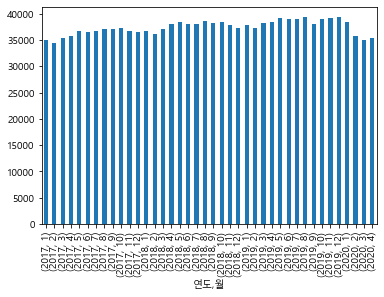

In [48]:
df_card.groupby(['연도','월'])['시도명'].count().plot.bar()

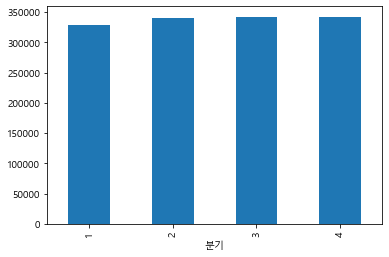

In [49]:
df_before_2020 = df_card[df_card['연도']<2020].copy()
df_before_2020.groupby(['분기'])['시도명'].count().plot.bar()

### 시도명

In [50]:
g = df_card.groupby(['시도명', '지역구분'])['이용금액'].sum()
sido = g.reset_index()
sido

,시도명,지역구분,이용금액
0,서귀포시,도심,798792480396
1,서귀포시,읍면,514927857769
2,제주시,도심,2915542429447
3,제주시,읍면,619162246558


! 분석 아이디어

**<span style="color:blue">서귀포시 POI 데이터 분포. 서귀포시 POI 수와 이용금액간 상관관계</span>.**

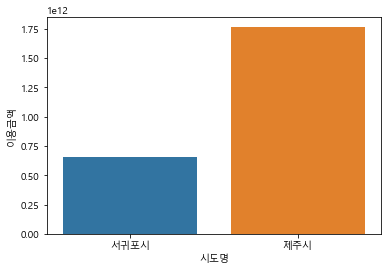

In [51]:
sns.barplot(x='시도명', y='이용금액', data=sido, ci=None) ##  이용 금액 합계

서귀포시보다 제주시에서의 이용 금액이 압도적으로 높다. why???? 

### 매장수
매장수는 연도/월/시도명/업종명 기준으로 나뉜다.

In [52]:
df_card.groupby(['연도','월','시도명','업종명'])[['매장수']].mean()

매장수
연도   월 시도명  업종명                          
2017 1 서귀포시 건강보조식품 소매업                 73
            골프장 운영업                    17
            과실 및 채소 소매업               669
            관광 민예품 및 선물용품 소매업         134
            그외 기타 분류안된 오락관련 서비스업        8
...                                   ...
2020 4 제주시  피자, 햄버거, 샌드위치 및 유사 음식점업   298
            한식 음식점업                  6733
            호텔업                        55
            화장품 및 방향제 소매업            1037
            휴양콘도 운영업                   21

[3150 rows x 1 columns]

In [53]:
a = df_card[(df_card['연도']==2017) & (df_card['월']==7) & (df_card['시도명']=='제주시')]['매장수']
b = df_card[(df_card['연도']==2017) & (df_card['월']==7) & (df_card['시도명']=='제주시')]['업종명']
a.nunique(), b.nunique()

(39, 41)

### 이용자 구분
제주도민, 내국인, 중국, 법인, 동남아, 일본, 기타외국 중 1

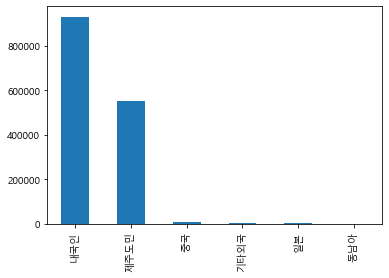

In [54]:
df_card['이용자 구분'].value_counts().plot.bar()

### 업종명 대분류

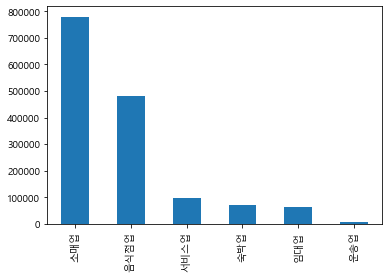

In [55]:
df_card['업종명 대분류'].value_counts().plot.bar()

### 업종명

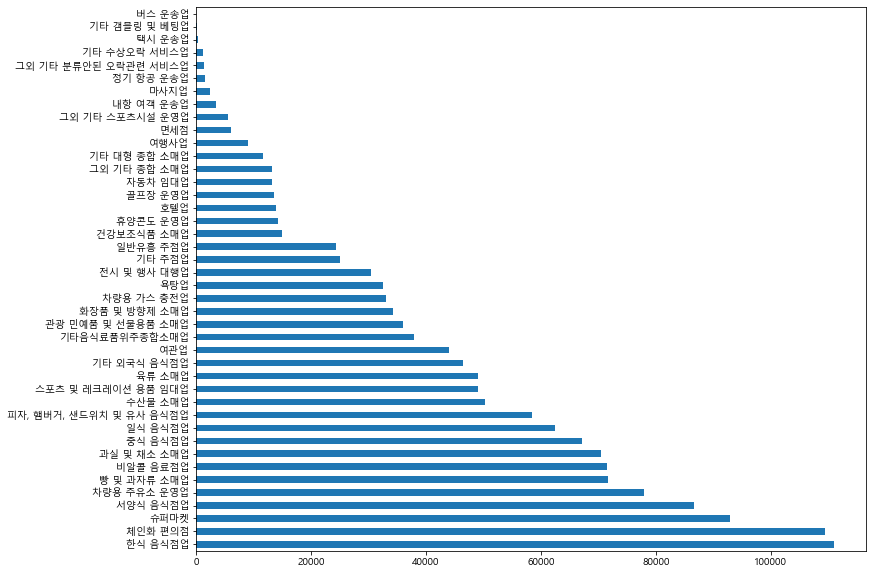

In [56]:
df_card['업종명'].value_counts().plot.barh(figsize=(12,10))

### 이용자 구분

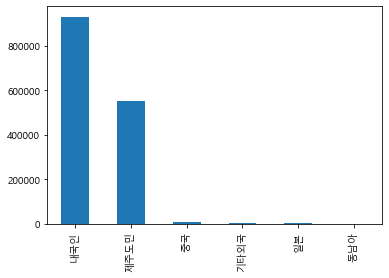

In [57]:
df_card['이용자 구분'].value_counts().plot.bar()

### 관광구분

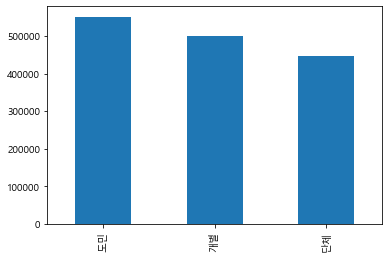

In [58]:
df_card['관광구분'].value_counts().plot.bar()

#### 개인 / 단체 이용 금액 비교

### 연령대

40, 50대에 가장 행 수가 많다.

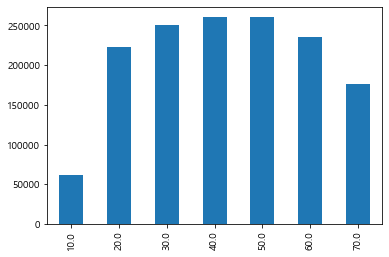

In [59]:
a = df_card['연령대'].value_counts()
sorted_idx = a.index.sort_values()
a[sorted_idx].plot.bar()

### 성별

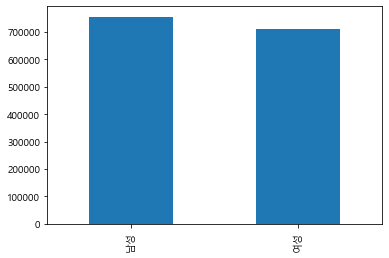

In [60]:
df_card['성별'].value_counts().plot.bar()

### 이용금액

#### 이용금액의 분포 확인

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


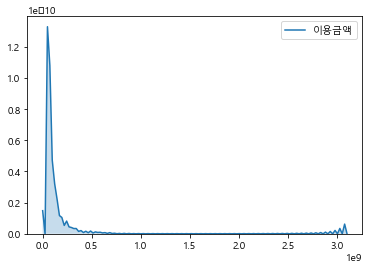

In [61]:
sns.kdeplot(df_card['이용금액'], shade=True)

#### 50만원 이하 이용금액 분포 확인

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


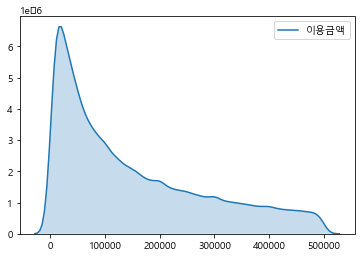

In [62]:
df_price_500000 = df_card[df_card['이용금액']<500000]
sns.kdeplot(df_price_500000['이용금액'], shade=True)

#### 10만원 이하 이용금액 분포 확인
확인 결과 1만 원 대 이용금액이 가장 보편적인 듯하며 그 이상의 이용금액은 점점 줄어드는 형태를 보인다.

5천원, 1만원 단위로 끊기는 금액이 많아서 그런지 파도치는 형태의 그래프

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


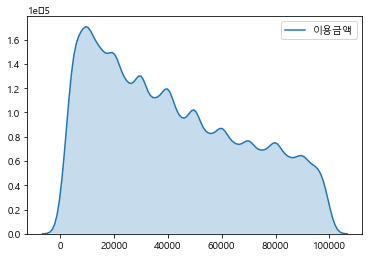

In [63]:
df_price_100000 = df_card[df_card['이용금액']<100000]
sns.kdeplot(df_price_100000['이용금액'], shade=True)

### 매장수

2019년 업종별 매장수 plot 결과 대부분 1000개 이하의 매장수를 가짐. 압도적으로 많은 수는 **한식 음식점업**

In [64]:
df_stores_2019_1 = df_card.groupby(['연도','월','시도명','업종명'])[['매장수']].mean().loc[2019,1].reset_index()
df_stores_2019_1 = df_stores_2019_1.groupby('업종명').sum() # 제주시, 서귀포시 매장수 합계
df_stores_2019_1.sort_values(by='매장수').tail()

,매장수
업종명,
화장품 및 방향제 소매업,1324
과실 및 채소 소매업,1577
서양식 음식점업,1996
여관업,3268
한식 음식점업,9769


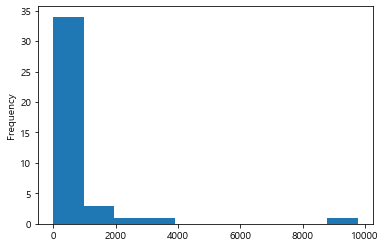

In [65]:
df_stores_2019_1['매장수'].plot(kind='hist')

In [66]:
df_card.columns

Index(['연도', '월', '분기', '시도명', '지역구분', '읍면동명', '업종명 대분류', '업종명', '이용자 구분',
       '관광구분', '연령대', '성별', '이용금액', '매장수'],
      dtype='object')

# 분석

## 분석 목표
1. 인기 업종 분석
  - 이용 금액이 높은 업종
  - 매장 수 대비 이용 금액
  
  
2. 이용자 구분 분석
  - 이용 금액이 높은 연령대, 성별, 국적 등
  
  
3. 계절에 따른 이용 금액
  - 마케팅 인사이트 도출